## Comparing Cross Sections of Different Isotopologues

In this tutorial we create cross sections for two isotopologues of the same molecule and overplot them to see the differences. We strongly recommend reading the [Quick Start](https://excalibur-alpha.readthedocs.io/en/latest/content/notebooks/quick_start.html) guide if you have not done so yet.

First, we must decide on the molecule. We choose to use two isotopologues of CO for this example, $^{12}$C$^{16}$O and $^{13}$C$^{16}$O. Let's begin by downloading both line lists from ExoMol. We start by importing the relevant modules and defining some parameters. 

In [1]:
''' Import module and define parameters'''

from excalibur.core import summon

species = 'CO'
database = 'ExoMol'

Technically, for $^{12}$C$^{16}$O, we just need to specify the molecule and database for the `species` and `database` parameters. Excalibur will then automatically assume the main isotopologue and most complete line list to download. So we could write this: 

`summon(database=database, species = species)`

However, for the purposes of the tutorial, we want to be as clear as possible with regards to the default parameters. Thus, we call the `summon` function with the `isotope` and `linelist` parameters defined. The convention to specify the `isotope` parameter is most easily explained by some examples: CO becomes 12C-16O, $^{13}$C$^{16}$O becomes 13C-16O, CH$_{4}$ becomes 12C-1H4. The `linelist` name can be found on the ExoMol website by clicking on the desired molecule. Defining each parameter is also necessary for non-main isotopologues, so this way we will be able to keep the notation consistent through the tutorial.

In [2]:
summon(database = database, species = species, isotope = '12C-16O', linelist = 'Li2015')  # Download 12C-16O line list



 ***** Downloading requested data from ExoMol. You have chosen the following parameters: ***** 

Molecule: CO 
Isotopologue: 12C-16O 
Line List: Li2015

Starting by downloading the .broad, .pf, and .states files...
This file is already downloaded. Moving on.
Fetched the broadening coefficients, partition functions, and energy levels.
Now downloading the Li2015 line list...

This file is already downloaded. Moving on.

This file is already downloaded. Moving on.

Line list ready.



We do the same for the second isotopologue, $^{13}$C$^{16}$O.

In [3]:
summon(database = database, species = species, isotope = '13C-16O', linelist = 'Li2015')  # Download 13C-16O line list


 ***** Downloading requested data from ExoMol. You have chosen the following parameters: ***** 

Molecule: CO 
Isotopologue: 13C-16O 
Line List: Li2015

Starting by downloading the .broad, .pf, and .states files...
This file is already downloaded. Moving on.
Fetched the broadening coefficients, partition functions, and energy levels.
Now downloading the Li2015 line list...

This file is already downloaded. Moving on.

Line list ready.



Now let's compute the cross section for both, at a pressure of 1 bar and temperature of 1000 Kelvin.

In [4]:
from excalibur.core import compute_cross_section

'''Compute cross section for both isotopologues'''

P = 1  # Pressure in bars
T = 1000  # Temperature in Kelvin
input_directory = './input/' # Top level directory containing line lists


# Make cross section for 12C-16O
compute_cross_section(species = species, database = database, isotope = '12C-16O', linelist = 'Li2015',
                                  temperature = T, pressure = P, input_dir = input_directory)

# Make cross section for 13C-16O
compute_cross_section(species = species, database = database, isotope = '13C-16O', linelist = 'Li2015',
                                  temperature = T, pressure = P, input_dir = input_directory)

Beginning cross-section computations...
Loading ExoMol format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 5.655626332999999 s
Pre-computation steps complete
Generating cross section for CO at P = 1 bar, T = 1000 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 2.201996417 s
Computing transitions from E2.h5 | 50.0% complete
Completed 6474 transitions in 0.05139137500000146 s
Calculation complete!
Completed 131970 transitions in 2.2557062499999994 s

Total runtime: 11.358481832999999 s
Beginning cross-section computations...
Loading ExoMol format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 5.086875917 s
Pre-computation steps complete
Generating cross section for CO at P = 1 bar, T = 1000 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 0.9148524170000023 s
Calculation complete!
Completed 125496 transitions in 0.9164977090000015 s


Finally, we are ready to plot. First, we import the relevant functions. Then, we read in the cross section files into arrays. 

Next, we create an empty array called `cross_sections` that will contain all of our cross sections. We add the $^{12}$C$^{16}$O cross section to this empty collection of cross sections. This is done by calling the `cross_section_collection` function with the data of the new cross section (`nu` and `sigma`) along with the `cross sections` parameter. We call this statement a second time, this time with `nu2` and `sigma2`, to add the $^{13}$C$^{16}$O cross section to the collection as well. By passing in the `collection = cross_sections` parameter every time, we ensure that all of our cross sections are added to the same collection, to make the plotting easier in the next part.

In [5]:
from excalibur.plot import read_cross_section_file, cross_section_collection

'''Read in the cross sections we just computed'''

nu, sigma = read_cross_section_file(species = species, database = database,
                                    filename = 'CO_T1000K_log_P0.0_H2-He_sigma.txt')

nu2, sigma2 = read_cross_section_file(species = species, database = database, 
                                      isotope = '13C-16O', linelist = 'Li2015', 
                                      filename = 'CO_T1000K_log_P0.0_H2-He_sigma.txt')

'''Add both cross sections to collection in preparation for plotting'''

cross_sections = []

# Add first cross section to collection
cross_sections = cross_section_collection(new_x = nu, new_y = sigma, collection = cross_sections)

# Add second cross section to collection, making sure to specify the previous collection as a parameter
cross_sections = cross_section_collection(new_x = nu2, new_y = sigma2, collection = cross_sections)

The last statement plots the data with the 3 required parameters, the collection of cross sections, labels for each of the cross sections, and the resulting file name that the user desires. 


Plotting complete.


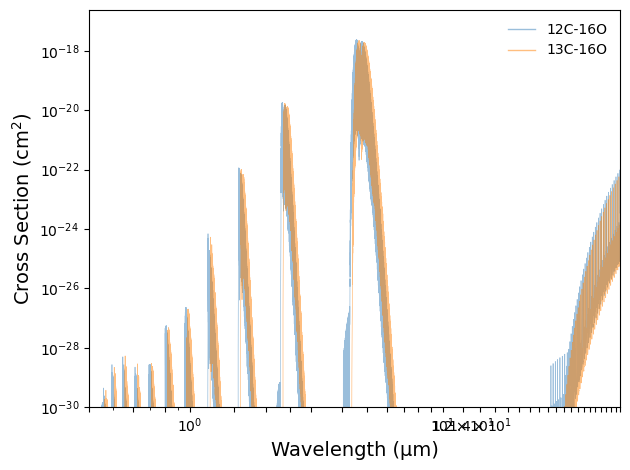

In [6]:
from excalibur.plot import plot_cross_section

'''Plot both cross sections on the same plot'''

plot_cross_section(collection = cross_sections, labels = ['12C-16O', '13C-16O'], filename = 'Different_Isotopologues_of_CO')


We can zoom into the region between 4$\mu m$ and 7$\mu m$ to show the differences more clearly. We specify the `x_min` and `x_max` parameters accordingly.


Plotting complete.


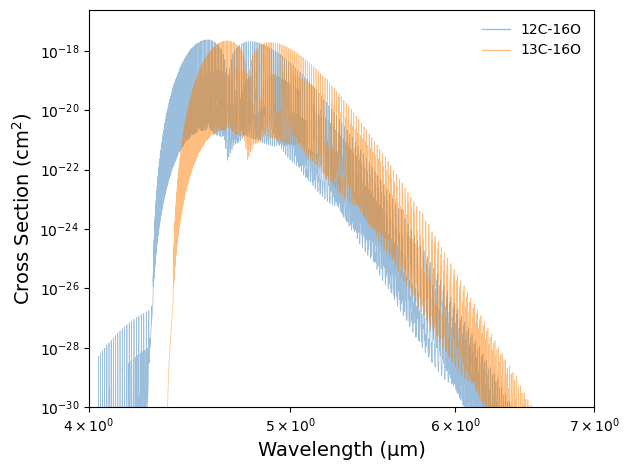

In [7]:
plot_cross_section(collection = cross_sections, labels = ['12C-16O', '13C-16O'], 
                   filename = 'Different_Isotopologues_of_CO_Zoomed', x_min = 4, x_max = 7)



### Write explanation - Ryan